In [2]:
%matplotlib inline

In [3]:
# all imports should go here

import pandas as pd
import sys
import os
import subprocess
import datetime
import platform
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import geopandas as gpd
import shapely
from shapely.geometry import Polygon

import numpy as np
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch

import math

In [4]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())

python version : 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
python environment : root
pandas version : 0.18.1
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\GeopandasNotebookProject\develop
Notebook run at: 2017-02-26 22:03:43.357345 local time
Notebook run at: 2017-02-26 12:03:43.357345 UTC
Notebook run on: Windows-10-10.0.14393-SP0


In [5]:
# path to saved figures
FIGURE_PREFIX = '../figures/'

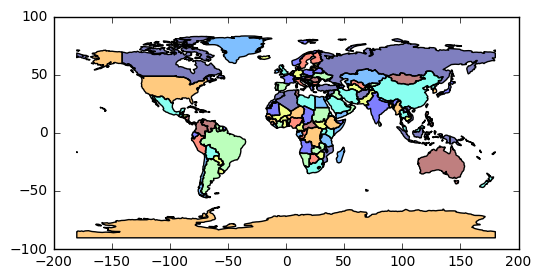

In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

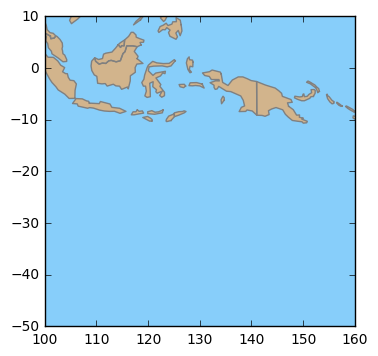

In [40]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

water = 'lightskyblue'
earth = 'tan'

ax.set_axis_bgcolor(water)

ax.set_xlim([100, 160])
ax.set_ylim([-50, 10])

# remove Oz
world[world['name']!='Australia'].plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)


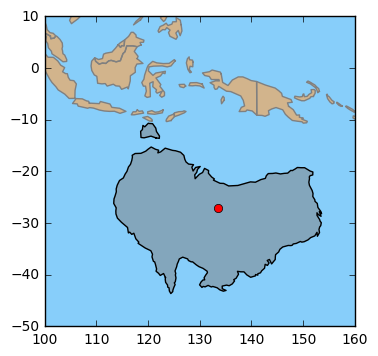

In [24]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# set the lon/lat bounds of the graphics
ax.set_xlim([100, 160])
ax.set_ylim([-50, 10])

# make the default color water
ax.set_axis_bgcolor(water)

# clip the world data to the clipper box
polys1 = gpd.GeoSeries([Polygon([(100,-50), (160,-50), (160,-5), (100,-5)])])
clipper = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1]})


# get Oz alone clipped (Sorry, Christmas Is)
ozdf = gpd.overlay(clipper, world[world['name']=='Australia'], how='intersection')

# create a GeoSeries from the GeoDataFrame
ozgs = gpd.GeoSeries([g for  g in ozdf['geometry']])

# get the Oz bounding box
x1,y1,x2,y2 = ozgs.total_bounds

# rotate Oz
ozgs2 = ozgs.rotate(180, origin=( (x1+x2)/2.0, (y1+y2)/2.0 ), use_radians=False)

# plot it
ozgs2.plot(ax=ax, facecolor='grey',)

water = 'lightskyblue'
earth = 'tan'

# plot the rest of the world
world[world['name']!='Australia'].plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

ax.plot((x1+x2)/2.0, (y1+y2)/2.0, marker='o', color='red')



In [8]:
ozdf.head()
#143.56

,df1,continent,gdp_md_est,iso_a3,name,pop_est,geometry
0,1,Oceania,800200.0,AUS,Australia,21262641.0,"POLYGON ((143.5618111513 -13.76365569423221, 1..."
1,1,Oceania,800200.0,AUS,Australia,21262641.0,POLYGON ((145.3979781434948 -40.79254851660589...


Create a rotated GeoSeries

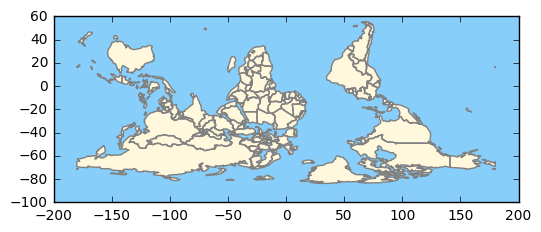

In [6]:
fig, ax = plt.subplots()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# make the default color water
water = 'lightskyblue'
earth = 'cornsilk'
ax.set_axis_bgcolor(water)

# create a GeoSeries from the GeoDataFrame
world2 = world[world['name']!='Antarctica']
wgs = gpd.GeoSeries([g for  g in world2['geometry']])

# rotate world
wgs2 = wgs.rotate(180, origin = (0,0), use_radians=False)

wgs2.plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)


Create a rotated GeoDataFrame

a


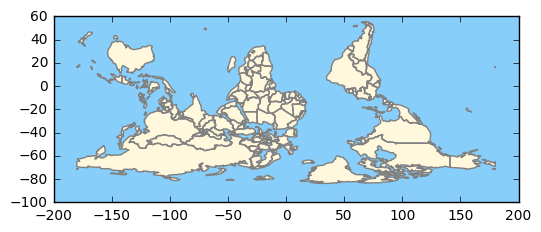

In [11]:
fig, ax = plt.subplots()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# make the default color water
water = 'lightskyblue'
earth = 'cornsilk'
ax.set_axis_bgcolor(water)

# create a GeoSeries from the GeoDataFrame
wgs = gpd.GeoSeries([g for  g in world['geometry']])

# rotate Oz
wgs2 = wgs.rotate(180, origin = (0,0), use_radians=False)

world['geometry'] = wgs2 

world[world['name']!='Antarctica'].plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)
print('a')

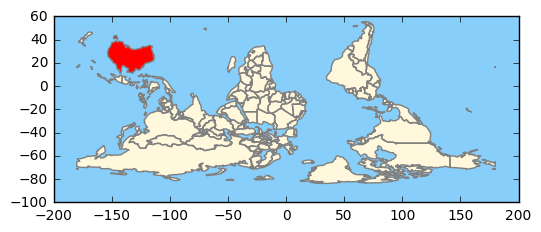

In [7]:
fig, ax = plt.subplots()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# make the default color water
water = 'lightskyblue'
earth = 'cornsilk'
ax.set_axis_bgcolor(water)

# create a GeoSeries from the GeoDataFrame
wgs = gpd.GeoSeries([g for  g in world['geometry']])

# rotate Oz
wgs2 = wgs.rotate(180, origin = (0,0), use_radians=False)

world['geometry'] = wgs2 

world[(world['name']!='Antarctica')&(world['name']!='Australia')].\
             plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

world[world['name']=='Australia'].\
             plot(ax=ax, edgecolor='grey', facecolor='red', linewidth=1, alpha=1)



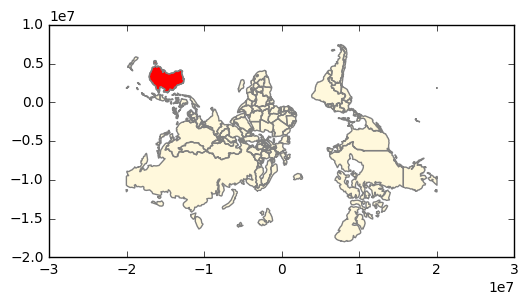

In [14]:
fig, ax = plt.subplots()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# make the default color water
water = 'lightskyblue'
earth = 'cornsilk'
#ax.set_axis_bgcolor(water)

# create a GeoSeries from the GeoDataFrame
wgs = gpd.GeoSeries([g for  g in world['geometry']])

# rotate the world
wgs2 = wgs.rotate(180, origin = (0,0), use_radians=False)


world['geometry'] = pd.Series([g for g in wgs2])

# plot in Mercator
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands") &\
              (world.name != "Greenland") ].to_crs({'init': 'epsg:3395'})


world.plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)
world[world['name']=='Australia'].\
             plot(ax=ax, edgecolor='grey', facecolor='red', linewidth=1, alpha=1)
 


{'init': 'epsg:4326'}


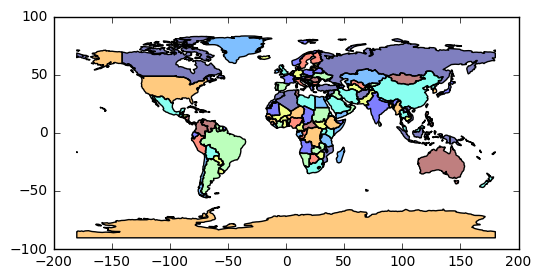

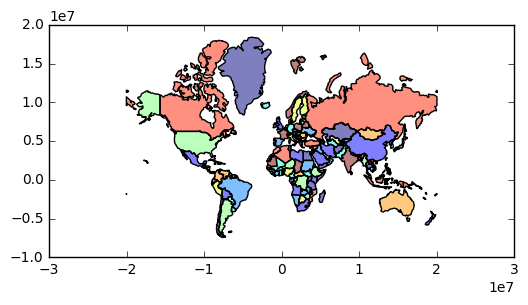

In [83]:
# load example data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check original projection
# (it's Platte Carre! x-y are long and lat)
print(world.crs)


# Visualize
world.plot();

# Reproject to Mercator (after dropping Antartica)
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

world = world.to_crs({'init': 'epsg:3395'}) # world.to_crs(epsg=3395) would also work
world.plot();

## Rotate world to center on Oz

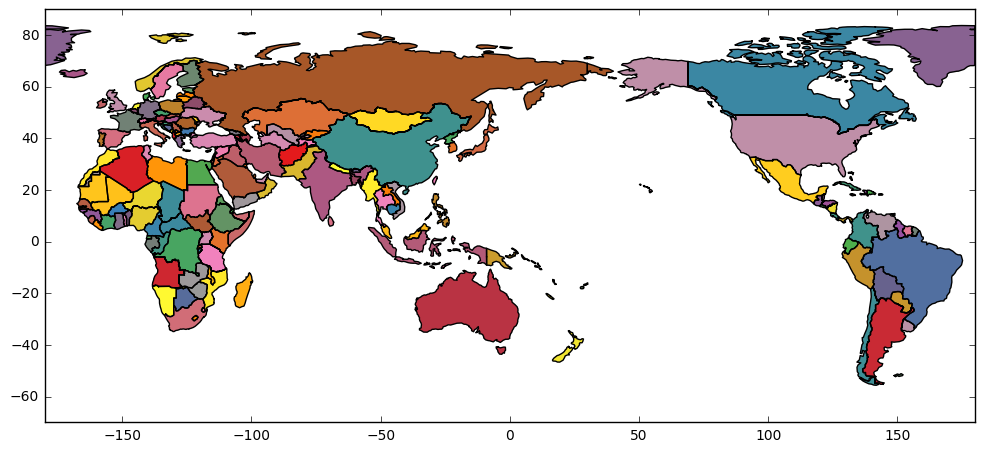

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# set the Axes plot limits to the bounding box
ax.set_xlim([-180, 180])
ax.set_ylim([-70,90])

water = 'lightskyblue'
earth = 'cornsilk'


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world2 = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

# clip the world data to the clipper box
polys1 = gpd.GeoSeries([Polygon([(-180,-90), (-30,-90), (-30,90), (-180,90)])])
clipper1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1]})
polys2 = gpd.GeoSeries([Polygon([(-30,-90), (180,-90), (180,90), (-30,90)])])
clipper2 = gpd.GeoDataFrame({'geometry': polys2, 'df1':[1]})


# clip part 1 and part 2
pt1_df = gpd.overlay(clipper1, world2, how='intersection')
pt2_df = gpd.overlay(clipper2, world2, how='intersection')


# create a GeoSeries from each GeoDataFrame
wgs1 = gpd.GeoSeries([g for  g in pt1_df['geometry']])
wgs2 = gpd.GeoSeries([g for  g in pt2_df['geometry']])

# left hand side wraps around to rhs
gs1 = wgs1.translate(xoff=210)
# move rhs leftwards
gs2 = wgs2.translate(xoff=-150)

pt1_df['geometry'] = gs1 
pt2_df['geometry'] = gs2 

both = pd.concat([pt1_df, pt2_df])
both.plot(ax=ax,  categorical=True, legend=False, figsize=(14,10), cmap='Set1', column='name', alpha=1)

plt.show()

# Rotate world map
To put Oz on top

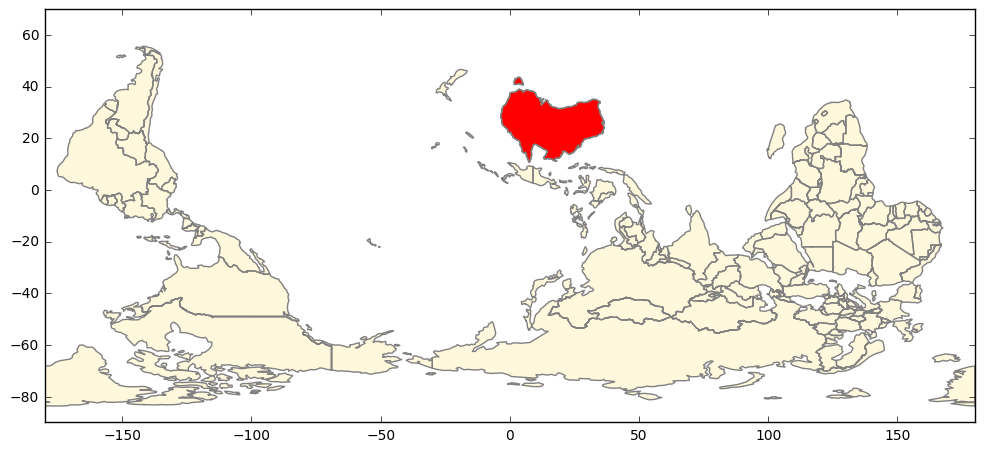

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# set the Axes plot limits to the bounding box
ax.set_xlim([-180, 180])
ax.set_ylim([-90,70])

water = 'lightskyblue'
earth = 'cornsilk'


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world2 = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")].copy(deep=True)
world2.reset_index(inplace=True)

# ------------- flip world

# create a GeoSeries from the GeoDataFrame
wgs = gpd.GeoSeries([g for  g in world2['geometry']])

# rotate 
wgs2 = wgs.rotate(180, origin = (0,0), use_radians=False)
# update the world geometry
world2['geometry'] = wgs2

# clip the world data to the clipper box
polys1 = gpd.GeoSeries([Polygon([(-180,-90), (30,-90), (30,90), (-180,90)])])
clipper1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1]})
polys2 = gpd.GeoSeries([Polygon([(30,-90), (180,-90), (180,90), (30,90)])])
clipper2 = gpd.GeoDataFrame({'geometry': polys2, 'df1':[1]})


# clip part 1 and part 2
pt1_df = gpd.overlay(clipper1, world2, how='intersection')
pt2_df = gpd.overlay(clipper2, world2, how='intersection')


# create a GeoSeries from each GeoDataFrame
wgs1 = gpd.GeoSeries([g for  g in pt1_df['geometry']])
wgs2 = gpd.GeoSeries([g for  g in pt2_df['geometry']])

# left hand side wraps around to rhs
gs1 = wgs1.translate(xoff=150)
# move rhs leftwards
gs2 = wgs2.translate(xoff=-210)

pt1_df['geometry'] = gs1 
pt2_df['geometry'] = gs2 

both = pd.concat([pt1_df, pt2_df])
both.plot(ax=ax,  edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)
both[both['name']=='Australia'].plot(ax=ax,  edgecolor='grey', facecolor='red', linewidth=1, alpha=1)

plt.show()

## Mapping QLD Coastlines

We get the lo-res worldf outlines, and define a Polygon that captures the Qld coastline

We then create a GeoDataFrame from the Polygon, and clip the world to the inside
of the clipping polygon.  

We then rotate the clipped world, and the clipping box

We then plot the clipping box, with a background of the water color,
and plot the clipped world

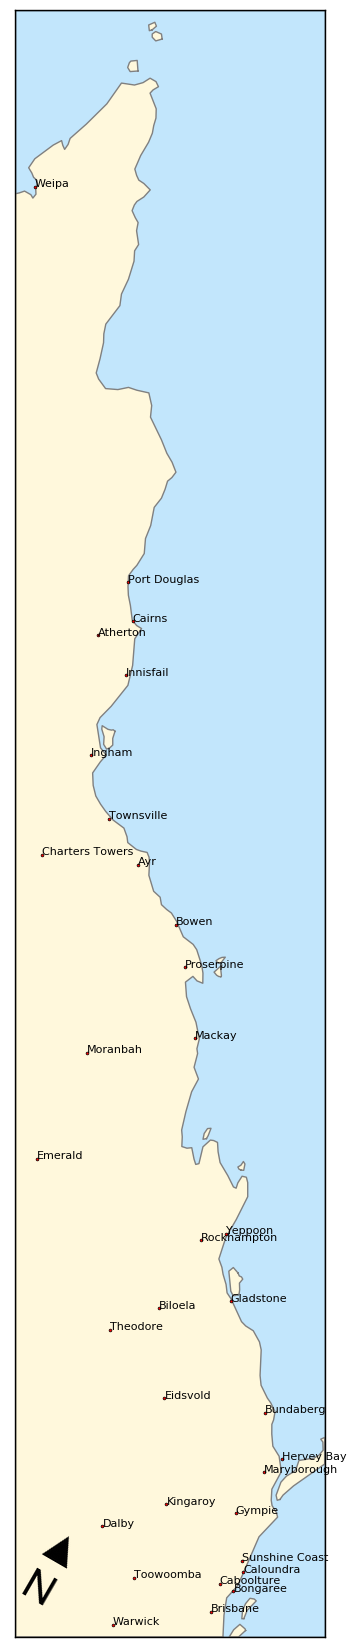

In [10]:
fig, ax = plt.subplots(figsize=(4, 21))

#  turn off lat lon tick labels
#  have a rotated axis doesn't make much sense
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.tick_params(labelbottom='off', labeltop='off', labelleft='off', labelright='off' ,\
                bottom='off', top='off', left='off', right='off' )


# define default colors
water = 'lightskyblue'
earth = 'cornsilk'

# read coarse coastline data
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# activate below for more detailed coastline
world = gpd.read_file('../data/shapefiles/ne_50m_land.shp')

# angle of QLD Pacific cost line
angle_d = 30
angle = angle_d*(math.pi/180)

# define bounding box for filtering operations
lon0 = 151
lat0 = -29

lon_width = 4
lat_height = 21


# rotate the bounding box to match the coastline slope
x0 = lon0
y0 = lat0

x1 = lon0 + math.cos(angle)*lon_width
y1 = lat0 + math.sin(angle)*lon_width

x2 = x1 - math.sin(angle)*lat_height
y2 = y1 + math.cos(angle)*lat_height

x3 = x2 - math.cos(angle)*lon_width
y3 = y2 - math.sin(angle)*lon_width

# set the Axes plot limits to the bounding box
ax.set_xlim([lon0, lon0+lon_width])
ax.set_ylim([lat0, lat0+lat_height])


# ------------------- plot coastlines ------------

# clip the world data to the clipper box

# box_poly will be used to clip points via shapely
# polys1 will be used to crtae a GeoDataFrame clipper1 for polygon clipping
box_poly = Polygon([(x0, y0), (x1, y1), (x2, y2), (x3, y3)])
polys1 = gpd.GeoSeries([Polygon([(x0, y0), (x1, y1), (x2, y2), (x3, y3)])])
clipper1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1]})

# clip cooastline
coast_df = gpd.overlay(clipper1, world, how='intersection')

# rotate coast
coast_gs = gpd.GeoSeries([g for  g in coast_df['geometry']])
coast_gs2 = coast_gs.rotate(-angle_d, origin = (x0,y0), use_radians=False)

# rotate clipping box
clipper1_gs = gpd.GeoSeries([g for  g in clipper1['geometry']])
clipper1_gs2 = clipper1_gs.rotate(-angle_d, origin = (x0,y0), use_radians=False)

# store back into GeoDataFrames
coast_df['geometry'] = pd.Series([g for g in coast_gs2])
clipper1['geometry'] = pd.Series([g for g in clipper1_gs2])


# plot the two data frames, filling clipping box with water
clipper1.plot(ax=ax, facecolor=water)
coast_df.plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

# ------------------- plot cities ------------
cities = gpd.read_file('../data/shapefiles/ne_10m_populated_places_simple.shp')

# clip cities; use Shapely, as GeoPandas 'overlay() only works for polygons
mask = [box_poly.contains(g) for g in cities['geometry']]
my_cities = cities[mask].copy(deep=True)
# necessary so can assign GeoSeries back to GeoDataFrame later
my_cities.reset_index(inplace=True)

# create GeoSeries from cities locations out of GeoDataFrame
c_gs = gpd.GeoSeries([g for g in my_cities['geometry'] ])

# rotate the GeoSeries
c_gs2 = c_gs.rotate(-angle_d, origin = (x0,y0), use_radians=False)

# update the 'geometry' column of the original GeoPandas data frame
my_cities['geometry'] = pd.Series([g for g in c_gs2])

# plot the GeoSeries
my_cities.plot(ax=ax, marker='o', color='red', )

for xy, n in zip(my_cities['geometry'], my_cities['name']):
    ax.text(xy.x, xy.y, s=n, fontsize=8)
#end for

# show northy arrow
# need a font that support enough Unicode to draw up arrow. need space after Unicode to allow wide char to be drawm?
ax.text(x0+0.5, y0+0.5,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial', rotation = -angle_d)

plt.show()

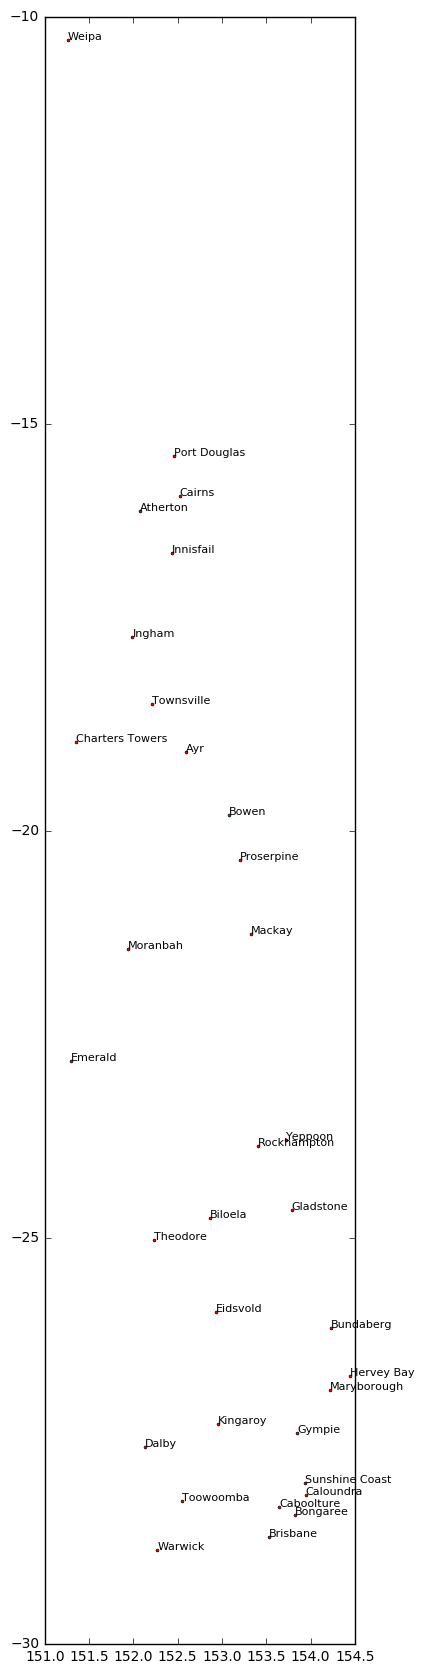

In [110]:
fig, ax = plt.subplots(figsize=(4, 21))

cities = gpd.read_file('../data/shapefiles/ne_10m_populated_places_simple.shp')

# clip cities; use Shapely, as GeoPandas 'overlay() only works for polygons
mask = [box_poly.contains(g) for g in cities['geometry']]
my_cities = cities[mask].copy(deep=True)
# necessary so can assign GeoSeries back to GeoDataFrame later
my_cities.reset_index(inplace=True)

# create GeoSeries from cities locations out of GeoDataFrame
c_gs = gpd.GeoSeries([g for g in my_cities['geometry'] ])

# rotate the GeoSeries
c_gs2 = c_gs.rotate(-angle_d, origin = (x0,y0), use_radians=False)

# update the 'geometry' column of the original GeoPandas data frame
my_cities['geometry'] = pd.Series([g for g in c_gs2])

# plot the GeoSeries
my_cities.plot(ax=ax, marker='o', color='red', )

for xy, n in zip(my_cities['geometry'], my_cities['name']):
    ax.text(xy.x, xy.y, s=n, fontsize=8)
#end for


In [60]:
b = my_cities.copy(deep=True)


In [93]:
my_cities.shape

(33, 37)

In [92]:
c_gs2.size

33

In [82]:
c_gs2.geometry

0     POINT (153.9353817648028 -28.01582408550519)
1     POINT (153.1991128182207 -20.35798116445383)
2     POINT (152.2313952106193 -25.03383076987666)
3     POINT (152.9323741383548 -25.91972650748065)
4     POINT (153.6472533476143 -28.31478599734569)
5     POINT (152.2690017115458 -28.84266982276968)
6      POINT (152.9584926307364 -27.2889752563519)
7     POINT (152.1332113981707 -27.56870701605943)
8     POINT (153.8233721463535 -28.41157522726354)
9      POINT (153.852768597487 -27.40071767408415)
10     POINT (151.989386032767 -17.61957929641881)
11     POINT (154.4499530027884 -26.7063948670945)
12    POINT (152.8668057747102 -24.75874671863581)
13    POINT (153.7228637098371 -23.79732272973392)
14    POINT (151.2907227111012 -22.83110917215353)
15    POINT (151.9340790196348 -21.45819449121474)
16    POINT (151.3534691517556 -18.90519444841004)
17    POINT (152.5967271555629 -19.03332290458516)
18    POINT (152.0751802392273 -16.07643917000641)
19    POINT (152.4588182912383 

In [52]:
my_cities.size


1221

In [49]:
c_gs2.size

33

In [36]:
import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}